# Support vector machine with rbf kernel

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import svm
import rbf_kernel

### Generate data

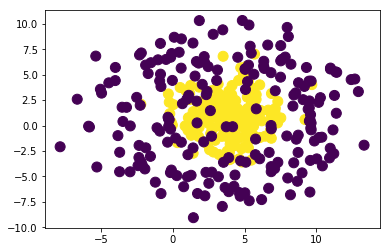

In [2]:
size = 200
r = 6
# blob 1
x = np.random.normal(4,2,(size))
y = np.random.normal(1,2,(size))
# blob 2
x2 = np.zeros(size)
y2 = np.zeros(size)
for i in range(size):
    x2[i] = 4+r*math.cos(2*math.pi*(i/size))# + 
    y2[i] = 1+r*math.sin(2*math.pi*(i/size))# + 
x2+=np.random.normal(0,2,(size))
y2+=np.random.normal(0,2,(size))

x = np.concatenate((x,x2))
y = np.concatenate((y,y2))
# add xy together, add intercept 
X = np.hstack((np.ones(2*size),x,y)).reshape(3,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = -1

plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.show()

**Test set**

In [3]:
s = size//2
# test set
# blob 1
tx = np.random.normal(4,1.5,s)
ty = np.random.normal(1,1.5,s)
# blob 2
tx2 = np.zeros(s)
ty2 = np.zeros(s)
for i in range(s):
    tx2[i] = 4+r*math.cos(2*math.pi*(i/s))# + 
    ty2[i] = 1+r*math.sin(2*math.pi*(i/s))# + 
tx2+=np.random.normal(0,1,s)
ty2+=np.random.normal(0,1,s)

tx = np.concatenate((tx,tx2))
ty = np.concatenate((ty,ty2))
# add xy together, add intercept 
tX = np.hstack((np.ones(size),tx,ty)).reshape(3,size).T
# reuse y for flags
ty[:s] = 1
ty[s:] = -1

### Linear SVC

In [4]:
linear = svm.SVM()
linear.fit(X,y)

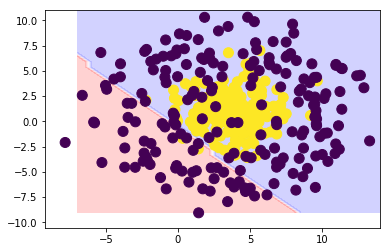

In [5]:
# decision boundary contour
xx = np.linspace(-7,14,40)
yy = np.linspace(-9,11,40)
xx, yy = np.meshgrid(xx,yy)
Z = linear.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
# boundary plot
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
# dataset
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.show()

**Decision boundary is clearly wrong**
<br><br>
**Consequently, performance is rather poor**

In [6]:
linear.score(X,y)

0.37

In [7]:
linear.score(tX,ty)

0.38

### SVC with rbf kernel

In [8]:
rbf = rbf_kernel.svm_rbf()

In [9]:
rbf.fit(X,y)
rbf.score(X,y)

0.915

In [10]:
rbf.score(tX,ty)

0.93

**Performance is substantially improved**

### Decision boundary

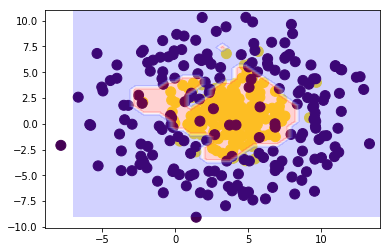

In [11]:
xx = np.linspace(-7,14,40)
yy = np.linspace(-9,11,40)
xx, yy = np.meshgrid(xx,yy)
Z = rbf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

**Data appears to be somewhat overfitted, observed test set below:**

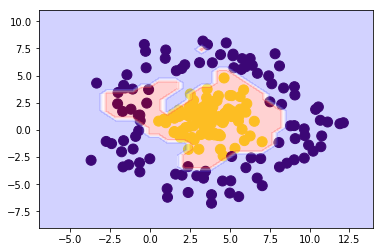

In [12]:
plt.scatter(tX[:,1],tX[:,2],c=ty,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

**Adjusting hyper-parameters**

In [13]:
rbf.fit(X,y,gamma=0.1,C=0.1)
rbf.score(tX,ty)

0.955

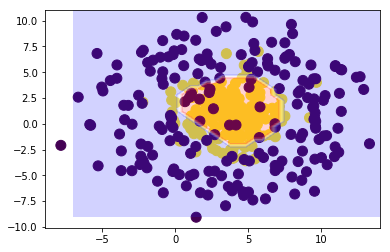

In [14]:
xx = np.linspace(-7,14,40)
yy = np.linspace(-9,11,40)
xx, yy = np.meshgrid(xx,yy)
Z = rbf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
plt.scatter(X[:,1],X[:,2],c=y,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

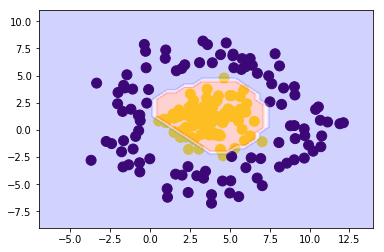

In [15]:
plt.scatter(tX[:,1],tX[:,2],c=ty,s=100)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

**This looks better; GridSearch would probably yield even better results**